###  Background

>The wine category is an extremely saturated and seasonal category with over 20K active items. The biggest wine brand has ~5% dollar share of the category. To provide prespective, the biggest brand in canned vegetables has at least 40% dollar share. The holidays make up a quarter of the annual sales. 

>The breadth of the category means intense competition, especially during the holidays. This presents a key challenge for management: resource allocation / portfolio management. 

>The data set has six variables: 4 categorical and 2 continuous:
*    Supplier = one manufacturer has multiple brands (Constellation Brands)
*    Brand = one brand can have multiple items (Clos Du Bois)
*    Product = one item (Clos du Bois Chard 750ml, Clos du Bois Cab 750ml, Clos du Bois Merlot 750ml)
*    Price Segment = the price tier that the item falls under
    *    Premium: wine that falls in the 8.00 - 10.99 price range
    *    Super: 11.00 - 14.99 price range
    *    Ultra: 15.00 - 19.99 price range
*    Dollar Sales = retail revenue
*    Feature and/or Display CWD = in-store promotional level as a precentage of the total US market (100% max)


###  Goal
>This analysis will use IRI in-store purchase sales data during October-December 2015 to explore the effect of promotional level on dollar sales in the US wine category. We will see if there's a linear relationship between the two variables or if there is a point of diminishing return. We will test what level of promotion is most optimal in growing dollar sales. Our hypothesis is that there is a point of diminishing return and the promotional level is most optimal at 40%.


### Project Steps
>Data Handling  
*   Import data with Pandas
*   Clean data
*   Explore data through Visualizations with Matplotlib

>Modeling
*    Create exponentials for x variable to test out hypothesis of linearity
*    Create dummies for the categorical variable Price Segment 
*    Split up the data into train vs. test data sets to avoid overfitting and see how close our predictions are in the test set
*    Run linear regression model on train data set
*    Run mean squared error to understand the errors of our prediction in the linear regression model (prediction vs. reality) 
*    Retrain until error is within acceptable range
*    Validate results


>Result Interpretation
*   Interpret results to see what had the most impact on the model
*   Evaluate how to improve or what else to test

(mean squared error = mean value of the squared deviations of the predictions from the true values) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pylab as pl
import seaborn as sns
from sklearn import feature_extraction, ensemble, cross_validation, metrics, neighbors, metrics, grid_search, cross_validation
%matplotlib inline
plt.style.use('ggplot')

### Data Handling
#### import  and read the data using pandas:

In [2]:
df = pd.read_csv("C:/Users/cso/Desktop/Data Science/sf-dat-21-master/final-project/final project data FNL.csv")
df

,Product,PriceSegment,Supplier,Brand,DollarSales,FeatureDisplayCWD
0,MORGAN CREEK ALL OTHER BLUSH NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,25677.388760,0.050950
1,MORGAN CREEK ALL OTHER RED NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,14200.119010,0.011881
2,MORGAN CREEK ALL OTHER WHITE NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,15564.383750,0.046831
3,MORGAN CREEK ALL OTHER RED VARIETALS 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,12877.311400,0.027078
4,MORGAN CREEK ALL OTHER WHITE VARIETALS 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,2544.300811,0.000740
5,CHATEAU GRAND TRAVERSE SELECT PINOT GRIGIO/PIN...,PREMIUM,CHATEAU GRAND TRAVERSE SELECT,CHATEAU GRAND TRAVERSE SELECT,3767.698587,NaN
6,ROCKY RIVER VINEYARDS ALL OTHER WHITE VARIETAL...,PREMIUM,ROCKY RIVER VINEYARDS,ROCKY RIVER VINEYARDS,251.907628,0.000445
7,ROCKY RIVER VINEYARDS WHITE ZINFANDEL 0.75LT,PREMIUM,ROCKY RIVER VINEYARDS,ROCKY RIVER VINEYARDS,116.203590,0.000921
8,10ONEHUNDRED RED MOSCATO/MUSCAT 0.75LT,PREMIUM,10ONEHUNDRED,10ONEHUNDRED,NaN,NaN
9,60 NORTH MERLOT 0.75LT,PREMIUM,MASON CELLARS,60 NORTH,6642.531787,0.002047


In [3]:
df.shape

(13672, 6)

In [4]:
print df.PriceSegment.value_counts().count()
print df.Supplier.value_counts().count()
print df.Brand.value_counts().count()
print df.Product.value_counts().count()

3
4261
5954
13670


In [5]:
df.isnull().sum()

Product                 0
PriceSegment            0
Supplier                0
Brand                   0
DollarSales          1101
FeatureDisplayCWD    7931
dtype: int64

### Handling missing values
Variables `DollarSales` and `FeatureDisplayCWD` have missing values as denoted with 'NaN' in the cell. These are not valuable for our analysis. We need values in both variables in order to understand the relationship between the two. To handle this we will use '.dropna()' to remove the observations from the data. Now we have a clean and tidy dataset that is ready for analysis.

In [6]:
df = df.dropna() 
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5741 entries, 0 to 13662
Data columns (total 6 columns):
Product              5741 non-null object
PriceSegment         5741 non-null object
Supplier             5741 non-null object
Brand                5741 non-null object
DollarSales          5741 non-null float64
FeatureDisplayCWD    5741 non-null float64
dtypes: float64(2), object(4)
memory usage: 314.0+ KB
None


### Data exploration using visualization with matplotlib

#### Subset agg

Before data exploration, lets set up the aggregation to allow us to do subset analysis.

Subset analysis helps to understand the dataset better. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:

In [7]:
f = {'DollarSales': ['sum'],'Product': ['count'],'FeatureDisplayCWD' : ['mean']}
df.groupby('Supplier').agg(f).sort_values(('DollarSales', 'sum'), ascending=False)[0:3][('Product', 'count')]

Supplier
CONSTELLATION BRANDS    174
E & J GALLO             116
STE MICHELLE             83
Name: (Product, count), dtype: int64

#### Now we can begin visualization. First lets see if there's a relationship between dollar sales and promotional level.

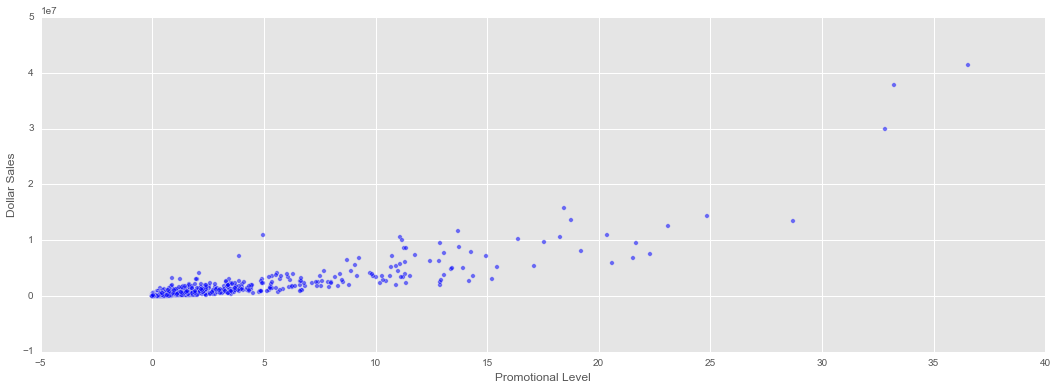

In [8]:
#Dollar Sales as it relates to Feature Display CWD
fig = plt.figure(figsize=(18,6), dpi=2000) 
alpha=alpha_scatterplot = 0.55
plt.scatter(df.FeatureDisplayCWD, df.DollarSales, alpha=alpha_scatterplot)
plt.xlabel('Promotional Level')
plt.ylabel('Dollar Sales')

#### What does the scatterplot say?

The scatterplot shows a positive relationship between the two variables: the higher the promotional level the higher dollar sales. So far, our hypothesis seems to be on the right track. Let's continue with data exploration to understand the dataset deeper:
 
 * Would the top three suppliers have an issue with item proliferation? How do we compare? 
 * Would the scatterplot findings hold true for the top 10 selling brands?
 * Any issue with item proliferation for these top selling brands? 

#### Let's cut up the data in different angles with the subset aggs:

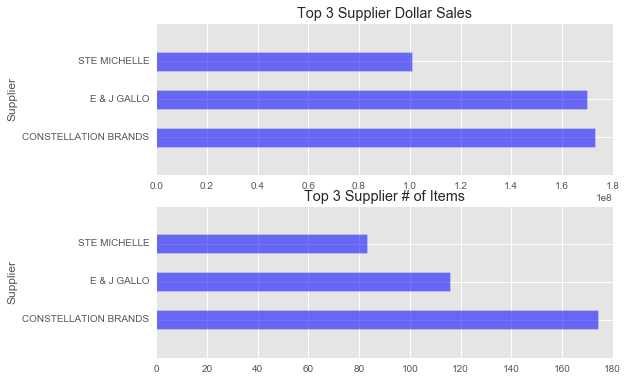

In [9]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=2000) 
alpha_bar_chart = .55

# top 3 suppliers dollar sales
ax1 = plt.subplot2grid((2,2),(0,0))            
df.groupby('Supplier').agg(f).sort_values(('DollarSales', 'sum'), ascending=False)[0:3][('DollarSales', 'sum')].plot(kind='barh', alpha=alpha_bar_chart)
ax1.set_ylim(-1,3)
plt.title("Top 3 Supplier Dollar Sales")

# top 3 suppliers count of items 
ax1 = plt.subplot2grid((2,2),(1,0))            
df.groupby('Supplier').agg(f).sort_values(('DollarSales', 'sum'), ascending=False)[0:3][('Product', 'count')].plot(kind='barh', alpha=alpha_bar_chart)
ax1.set_ylim(-1,3)
plt.title("Top 3 Supplier # of Items")


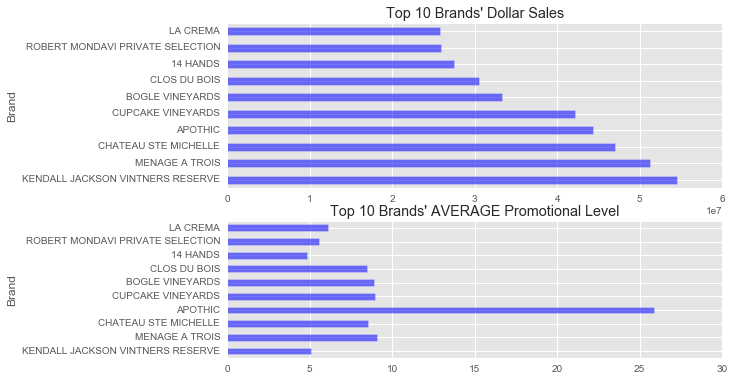

In [10]:
fig = plt.figure(figsize=(18,6), dpi=2000) 
alpha_bar_chart = .55

plt.subplot2grid((12,12),(0,0),rowspan=6,colspan=6)
df.groupby('Brand').agg(f).sort_values(('DollarSales', 'sum'), ascending=False)[0:10][('DollarSales', 'sum')].plot(kind='barh', alpha=alpha_bar_chart)
plt.title("Top 10 Brands' Dollar Sales")

plt.subplot2grid((12,12),(7,0),rowspan=6,colspan=6)
df.groupby('Brand').agg(f).sort_values(('DollarSales', 'sum'), ascending=False)[0:10][('FeatureDisplayCWD', 'mean')].plot(kind='barh', alpha=alpha_bar_chart)
plt.title("Top 10 Brands' AVERAGE Promotional Level")

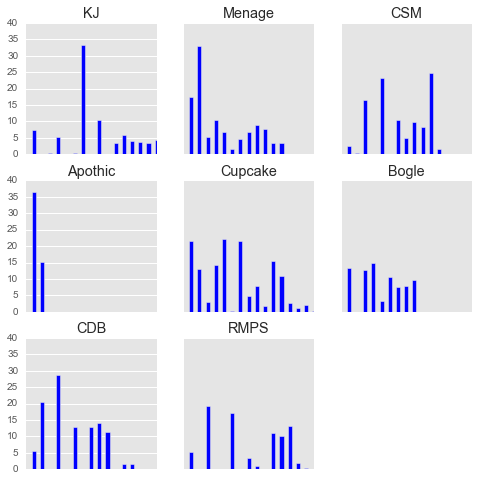

In [11]:
fig = plt.figure(figsize=(8,8), dpi=1600) 

ax1 = plt.subplot2grid((3,3),(0,0))
df.FeatureDisplayCWD[df.Brand == 'KENDALL JACKSON VINTNERS RESERVE'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
# ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("KJ")

ax1 = plt.subplot2grid((3,3),(0,1))
df.FeatureDisplayCWD[df.Brand == 'MENAGE A TROIS'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("Menage")

ax1 = plt.subplot2grid((3,3),(0,2))
df.FeatureDisplayCWD[df.Brand == 'CHATEAU STE MICHELLE'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("CSM")

ax1 = plt.subplot2grid((3,3),(1,0))
df.FeatureDisplayCWD[df.Brand == 'APOTHIC'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
# ax1.axes.get_yaxis().set_visible(False)
ax1.set_xlim(-1,3)
ax1.axis([-1,15,0,40])
plt.title("Apothic")

ax1 = plt.subplot2grid((3,3),(1,1))
df.FeatureDisplayCWD[df.Brand == 'CUPCAKE VINEYARDS'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("Cupcake")

ax1 = plt.subplot2grid((3,3),(1,2))
df.FeatureDisplayCWD[df.Brand == 'BOGLE VINEYARDS'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("Bogle")

ax1 = plt.subplot2grid((3,3),(2,0))
df.FeatureDisplayCWD[df.Brand == 'CLOS DU BOIS'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
# ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("CDB")

ax1 = plt.subplot2grid((3,3),(2,1))
df.FeatureDisplayCWD[df.Brand == 'ROBERT MONDAVI PRIVATE SELECTION'].plot(kind='bar')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axis([-1,15,0,40])
plt.title("RMPS")

#### what do these subsets say? 

We have a bigger problem with item proliferation than the other two top suppliers. One item under each brand has high promotional level. The total brand’s average promotional level was lowered due to the other items with lower promotional level.

* Constellation and Gallo have similar dollar sales, but Constellation has roughly 60 more items than Gallo 
* With the exception of Apothic, the top ten selling brands have promotional level of less than 10%
* However, the promotional levels have been diluted by the numerous items under each product
* Apothic only has two items under the brand and shows very strong sales as a total brand with only two items

With this deeper understanding, we are better equipped to create better more insightful models.

## Modeling

### Create exponential variables
#### We will first create exponentials of the dependent variable to include in the model to see if the effect is linear

In [12]:
df['cwd_squared'] = df.FeatureDisplayCWD ** 2
df['cwd_cubed'] = df.FeatureDisplayCWD ** 3
df['cwd_quad'] = df.FeatureDisplayCWD ** 4
df['cwd_fifth'] = df.FeatureDisplayCWD ** 5
df['cwd_sixth'] = df.FeatureDisplayCWD ** 6

C:\Users\cso\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\cso\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\cso\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

### Create dummy variables
#### We will also create dummy variables for price segment variable to understand the effect of price tiers on dollar sales

In [13]:
dummy_df = pd.get_dummies(df.PriceSegment, prefix = 'dummy')
df = df.join(dummy_df.iloc[:, 1:])
df.columns

# last_2_cols = [col.lower().replace('- ', '').replace("$", "").replace(" ", "_").replace(".", "") for col in df.columns[-2:]]
# df.columns = list(df.columns[:-2]) + last_2_cols
# df.columns

Index([u'Product', u'PriceSegment', u'Supplier', u'Brand', u'DollarSales',
       u'FeatureDisplayCWD', u'cwd_squared', u'cwd_cubed', u'cwd_quad',
       u'cwd_fifth', u'cwd_sixth', u'dummy_SUPER', u'dummy_ULTRA'],
      dtype='object')

### Splitting the data into training and test sets: 
Learning the parameters of a prediction function and testing it on the same data could lead to the problem of overfitting. To avoid it, it is common to hold out part of the available data as a train set when performing a linear regression analysis. This provides estimates of test-set prediction error.

The test error is a new error incurred on new data; training error is the error we get from applying the same model to the same set of data we set as test data. 

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. There is not standard split ratio, but it is common to split the data set into 60/40 or 80/20 ratio. We are going to split it into 60/40.

In [14]:
y = df.DollarSales
X = df[['FeatureDisplayCWD', 'cwd_squared', 'cwd_cubed', 'cwd_quad', 'cwd_fifth', 'cwd_sixth', 'dummy_SUPER', 'dummy_ULTRA']]

train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.4)


In [15]:
y.describe()
test_y.describe()

count        2297.000000
mean       202861.701700
std       1015068.149825
min            16.990000
25%          4897.560991
50%         16872.565620
75%         75425.680570
max      29900000.000000
Name: DollarSales, dtype: float64

In [16]:
X = df[ ['FeatureDisplayCWD','dummy_SUPER',"dummy_ULTRA"] ]
y = df['DollarSales']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DollarSales   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     6405.
Date:                Thu, 28 Apr 2016   Prob (F-statistic):               0.00
Time:                        13:31:10   Log-Likelihood:                -84340.
No. Observations:                5741   AIC:                         1.687e+05
Df Residuals:                    5738   BIC:                         1.687e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
FeatureDisplayCWD  5.508e+05   4005.259    137.513      0.000      5.43e+05  5.59e+05
dummy_SUPER        1.093e+04   1.25e+04      0.878      0.380     -1.35e+04  3.53e+04
dummy_ULTRA        2.423e+04   1.82e+04      1.332      0.183     -1.14e+04  5.99e+04
==============================================================================
Omnibus:                    11569.435   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         82866539.004
Skew:                          16.024   Prob(JB):                         0.00
Kurtosis:                     590.701   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = df[ ['FeatureDisplayCWD','cwd_squared','cwd_cubed','cwd_quad','cwd_fifth','cwd_sixth','dummy_SUPER',"dummy_ULTRA"] ]
y = df['DollarSales']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DollarSales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     6646.
Date:                Thu, 28 Apr 2016   Prob (F-statistic):               0.00
Time:                        13:31:10   Log-Likelihood:                -81872.
No. Observations:                5741   AIC:                         1.638e+05
Df Residuals:                    5733   BIC:                         1.638e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
FeatureDisplayCWD  7.108e+05   2.55e+04     27.929      0.000      6.61e+05  7.61e+05
cwd_squared       -1.719e+05   1.16e+04    -14.775      0.000     -1.95e+05 -1.49e+05
cwd_cubed          2.853e+04   1752.156     16.285      0.000      2.51e+04   3.2e+04
cwd_quad          -1911.8322    112.203    -17.039      0.000     -2131.793 -1691.872
cwd_fifth            55.4037      3.181     17.415      0.000        49.167    61.640
cwd_sixth            -0.5659      0.033    -17.194      0.000        -0.630    -0.501
dummy_SUPER        2.983e+04   8403.272      3.550      0.000      1.34e+04  4.63e+04
dummy_ULTRA        3.242e+04   1.21e+04      2.690      0.007      8796.358   5.6e+04
==============================================================================
Omnibus:                     6903.207   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5693204.876
Skew:                           5.661   Prob(JB):                         0.00
Kurtosis:                     156.857   Cond. No.                     2.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
df

,Product,PriceSegment,Supplier,Brand,DollarSales,FeatureDisplayCWD,cwd_squared,cwd_cubed,cwd_quad,cwd_fifth,cwd_sixth,dummy_SUPER,dummy_ULTRA
0,MORGAN CREEK ALL OTHER BLUSH NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,25677.388760,0.050950,2.595912e-03,1.322620e-04,6.738760e-06,3.433404e-07,1.749323e-08,0,0
1,MORGAN CREEK ALL OTHER RED NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,14200.119010,0.011881,1.411676e-04,1.677268e-06,1.992829e-08,2.367759e-10,2.813229e-12,0,0
2,MORGAN CREEK ALL OTHER WHITE NON VARIETAL 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,15564.383750,0.046831,2.193098e-03,1.027039e-04,4.809677e-06,2.252397e-07,1.054809e-08,0,0
3,MORGAN CREEK ALL OTHER RED VARIETALS 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,12877.311400,0.027078,7.332152e-04,1.985396e-05,5.376045e-07,1.455723e-08,3.941798e-10,0,0
4,MORGAN CREEK ALL OTHER WHITE VARIETALS 0.75LT,PREMIUM,MORGAN CREEK,MORGAN CREEK,2544.300811,0.000740,5.476000e-07,4.052240e-10,2.998658e-13,2.219007e-16,1.642065e-19,0,0
6,ROCKY RIVER VINEYARDS ALL OTHER WHITE VARIETAL...,PREMIUM,ROCKY RIVER VINEYARDS,ROCKY RIVER VINEYARDS,251.907628,0.000445,1.980250e-07,8.812113e-11,3.921390e-14,1.745019e-17,7.765333e-21,0,0
7,ROCKY RIVER VINEYARDS WHITE ZINFANDEL 0.75LT,PREMIUM,ROCKY RIVER VINEYARDS,ROCKY RIVER VINEYARDS,116.203590,0.000921,8.482410e-07,7.812300e-10,7.195128e-13,6.626713e-16,6.103203e-19,0,0
9,60 NORTH MERLOT 0.75LT,PREMIUM,MASON CELLARS,60 NORTH,6642.531787,0.002047,4.190356e-06,8.577810e-09,1.755909e-11,3.594408e-14,7.357883e-17,0,0
10,ACRONYM ALL OTHER RED BLENDS 0.75LT,PREMIUM,WINERY EXCHANGE,ACRONYM,851994.171900,2.085794,4.350539e+00,9.074330e+00,1.892719e+01,3.947822e+01,8.234346e+01,0,0
11,ACRONYM ALL OTHER WHITE BLENDS 0.75LT,PREMIUM,WINERY EXCHANGE,ACRONYM,122656.018300,0.525458,2.761058e-01,1.450819e-01,7.623439e-02,4.005794e-02,2.104875e-02,0,0


### Train and test errors
#### Run mean squared error to understand the errors of our prediction in the linear regression model (prediction vs. reality)
#### The errors here are high relativity to the mean of the dataset, but could this be driven by purposeful inclusion of the outliers? 

In [19]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

384285.334236
367679.941584


In [20]:
train_y.mean()

228832.6290386271

In [21]:
test_y.mean()

202861.70170026267

In [22]:
(test_y - test_y_hat).mean()

1925.1768864300811

### Remove Outliers
#### The high train / test errors could be due to the outliers as seen in the scatterplot above. Lets remove these outliers to see if that's true  

In [23]:
len(df)

5741

In [24]:
Q1 = df.FeatureDisplayCWD.quantile(0.25)
Q3 = df.FeatureDisplayCWD.quantile(0.75)

IQR = Q3 - Q1

IQR

0.086654403000000005

In [25]:
df.drop(df[df.FeatureDisplayCWD > Q3 + 1.5 * IQR].index, inplace = True)

In [26]:
len(df)

4825

### Lets re-run the train / test error with outliers removed
#### The high train / test errors are much lower now without the outliers 

In [27]:
y1 = df.DollarSales
X1 = df[['FeatureDisplayCWD', 'cwd_squared', 'cwd_cubed', 'cwd_quad', 'cwd_fifth', 'cwd_sixth', 'dummy_SUPER', 'dummy_ULTRA']]

train_X1, test_X1, train_y1, test_y1 = cross_validation.train_test_split(X1, y1, test_size = 0.4)


In [28]:
X1 = df[ ['FeatureDisplayCWD','cwd_squared','cwd_cubed','cwd_quad','cwd_fifth','cwd_sixth','dummy_SUPER',"dummy_ULTRA"] ]
y1 = df['DollarSales']

model = sm.OLS(y1, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DollarSales   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     526.5
Date:                Thu, 28 Apr 2016   Prob (F-statistic):               0.00
Time:                        13:31:10   Log-Likelihood:                -59395.
No. Observations:                4825   AIC:                         1.188e+05
Df Residuals:                    4817   BIC:                         1.189e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
FeatureDisplayCWD  2.564e+06   2.77e+05      9.267      0.000      2.02e+06  3.11e+06
cwd_squared       -8.467e+07    1.7e+07     -4.971      0.000     -1.18e+08 -5.13e+07
cwd_cubed          1.494e+09   3.79e+08      3.938      0.000       7.5e+08  2.24e+09
cwd_quad          -1.127e+10   3.76e+09     -2.998      0.003     -1.86e+10  -3.9e+09
cwd_fifth          3.605e+10   1.69e+10      2.129      0.033      2.85e+09  6.92e+10
cwd_sixth         -3.798e+10   2.83e+10     -1.343      0.179     -9.34e+10  1.75e+10
dummy_SUPER        2137.0653   1577.311      1.355      0.176      -955.184  5229.315
dummy_ULTRA         726.7332   2069.508      0.351      0.725     -3330.448  4783.914
==============================================================================
Omnibus:                     4260.056   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           201083.414
Skew:                           4.055   Prob(JB):                         0.00
Kurtosis:                      33.569   Cond. No.                     2.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
train_y1_hat = model.predict(train_X1)
print np.sqrt(metrics.mean_squared_error(train_y1, train_y1_hat))

test_y1_hat = model.predict(test_X1)
print np.sqrt(metrics.mean_squared_error(test_y1, test_y1_hat))

47403.8597314
61915.2393649


In [30]:
test_y1.mean()

39554.48018947337

In [31]:
train_y1.mean()

33429.03868720429

In [32]:
test_y.describe()

count        2297.000000
mean       202861.701700
std       1015068.149825
min            16.990000
25%          4897.560991
50%         16872.565620
75%         75425.680570
max      29900000.000000
Name: DollarSales, dtype: float64

### Conclusion
* Contradictory to our hypothesis, promotion has an exponential effect on dollar sales once it reaches 25%
* The optimal point with greatest dollar sales increase is ~30% 
* There is definitely a relationship between sales and promotional level

### Next Steps
* Spline regression to look at the effects for the outliers and non-outliers
* Evaluate more measures (distribution, price)
* Cross elasticity to see how changes on one item impact another item

In [33]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

In [54]:
cwd = np.array(range(4, 41))
cwd = pd.Series(cwd)

In [55]:
# sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3)
# sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3) - 1911.8322 * (cwd ** 4)
sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3) - 1911.8322 * (cwd ** 4) + 55.4037 * (cwd ** 5) 
# sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 1/2) + 2.853e+4 * (cwd ** 1/3) - 1911.8322 * (cwd ** 1/4) + 55.4037 * (cwd ** 1/5) - 0.5659 * (cwd ** 1/6)

In [56]:
sales = pd.Series(sales)

In [57]:
df = pd.DataFrame({'cwd': cwd, 'sales': sales})

In [58]:
df

,cwd,sales
0,4,1.447144e+06
1,5,1.752391e+06
2,6,2.133645e+06
3,7,2.611111e+06
4,8,3.199004e+06
...,...,...
32,36,1.272458e+09
33,37,1.494569e+09
34,38,1.747407e+09
35,39,2.034097e+09


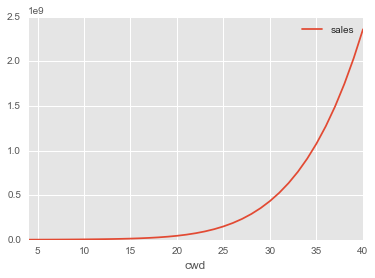

In [59]:
df.plot(x = 'cwd', y = 'sales')

In [40]:
cwd = np.array(range(5, 20))
cwd = pd.Series(cwd)

In [41]:
sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3) - 1911.8322 * (cwd ** 4) + 55.4037 * (cwd ** 5) 

In [42]:
sales = pd.Series(sales)

In [43]:
df = pd.DataFrame({'cwd': cwd, 'sales': sales})

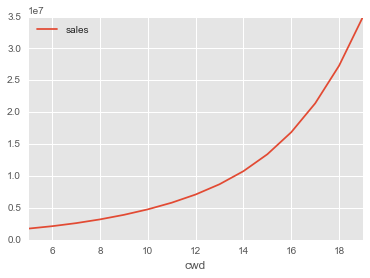

In [44]:
df.plot(x = 'cwd', y = 'sales')

In [45]:
cwd = np.array(range(20, 40))
cwd = pd.Series(cwd)

In [46]:
sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3) - 1911.8322 * (cwd ** 4) + 55.4037 * (cwd ** 5) 

In [47]:
sales = pd.Series(sales)

In [48]:
df = pd.DataFrame({'cwd': cwd, 'sales': sales})

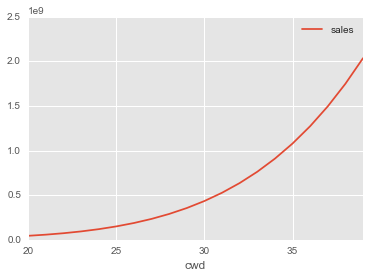

In [49]:
df.plot(x = 'cwd', y = 'sales')

In [50]:
sales = 7.0108e+5 - 1.719e+5 * 2 * cwd + 2.853e+4 * 3 * (cwd ** 2) - 1911.8322 * 4 * (cwd ** 3) + 55.4037 * 5 * (cwd ** 4) 

In [51]:
sales = pd.Series(sales)

In [52]:
df = pd.DataFrame({'cwd': cwd, 'sales': sales})

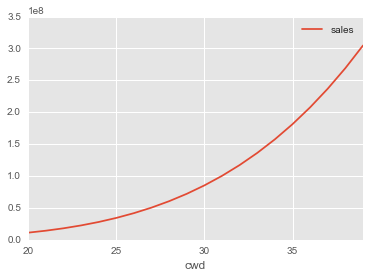

In [53]:
df.plot(x = 'cwd', y = 'sales')

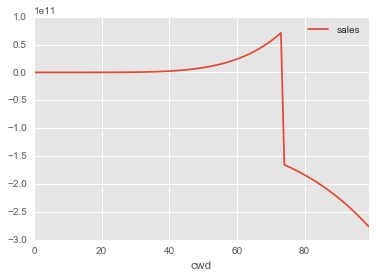

In [61]:
cwd = np.array(range(0, 100))
cwd = pd.Series(cwd)

sales = 7.0108e+5 * cwd - 1.719e+5 * (cwd ** 2) + 2.853e+4 * (cwd ** 3) - 1911.8322 * (cwd ** 4) + 55.4037 * (cwd ** 5) 
df = pd.DataFrame({'cwd': cwd, 'sales': sales})
df.plot(x = 'cwd', y = 'sales')